# Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
from tqdm import tqdm
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset

In [2]:
file_path = 'archive/cleaned_dataset/data/*csv'

meta_data_path = 'archive/cleaned_dataset/metadata.csv'
meta_data = pd.read_csv(meta_data_path)

meta_data.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


### Loading only the impedence part of the dataset

In [3]:
selected_type = 'impedance'
selected_data = meta_data[meta_data['type'] == selected_type]

selected_data

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
13,impedance,[2010. 7. 22. 17. 3. ...,24,B0047,13,14,00014.csv,NaN,0.05963791501051059,0.21039872263834902
15,impedance,[2010. 7. 22. 20. 40. 25.5],24,B0047,15,16,00016.csv,NaN,0.05512505361624278,0.1754882075917004
17,impedance,[2010. 7. 23. 11. 35. ...,24,B0047,17,18,00018.csv,NaN,0.058878485312444453,0.19095687096090014
...,...,...,...,...,...,...,...,...,...,...
7536,impedance,[2010. 9. 28. 16. 5. ...,24,B0055,223,7537,07537.csv,NaN,0.09747109901247247,0.15760912100719615
7546,impedance,[2010. 9. 29. 8. 16. ...,24,B0055,233,7547,07547.csv,NaN,0.0982550032520246,0.14877104776241656
7548,impedance,[2010. 9. 29. 11. 53. ...,24,B0055,235,7549,07549.csv,NaN,0.09778722154159296,0.15088524149658153
7558,impedance,[2010. 9. 30. 3. 59. ...,24,B0055,245,7559,07559.csv,NaN,0.09867936363638956,0.15274663175569908


# Data Pre Processing

In [4]:
selected_data.columns

Index(['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id',
       'uid', 'filename', 'Capacity', 'Re', 'Rct'],
      dtype='object')

### Dropping irrelavant columns

In [5]:
selected_data = selected_data.drop(columns = ['type', 'ambient_temperature', 'battery_id', 'test_id',
       'uid', 'filename', 'Capacity'])

In [6]:
selected_data.head()

,start_time,Re,Rct
1,[2010. 7. 21. 16. 53. ...,0.05605783343888099,0.20097016584458333
3,[2010 7 21 20 31 5],0.05319185850921101,0.16473399914864734
13,[2010. 7. 22. 17. 3. ...,0.05963791501051059,0.21039872263834902
15,[2010. 7. 22. 20. 40. 25.5],0.05512505361624278,0.1754882075917004
17,[2010. 7. 23. 11. 35. ...,0.058878485312444453,0.19095687096090014


### Sorting according to start time to visualize battery aging

In [7]:
sorted_data = selected_data.sort_values(by='start_time')

In [8]:
sorted_data.head()

,start_time,Re,Rct
5780,[2.0080e+03 4.0000e+00 1.9000e+01 2.0000e+00 1...,0.03971312292013592,0.06180654339682964
4548,[2.0080e+03 4.0000e+00 1.9000e+01 2.0000e+00 1...,0.06062991544979002,0.07802409378290423
5164,[2.0080e+03 4.0000e+00 1.9000e+01 2.0000e+00 1...,0.044843430573346096,0.0679720560130687
5182,[2.0080e+03 4.0000e+00 2.0000e+01 1.0000e+00 8...,0.04717044086931744,0.07208112164479205
5798,[2.0080e+03 4.0000e+00 2.0000e+01 1.0000e+00 8...,0.04169865656080958,0.0720729677827527


In [9]:
sorted_data.columns

Index(['start_time', 'Re', 'Rct'], dtype='object')

# Data Visualization using plotly

### Line plot

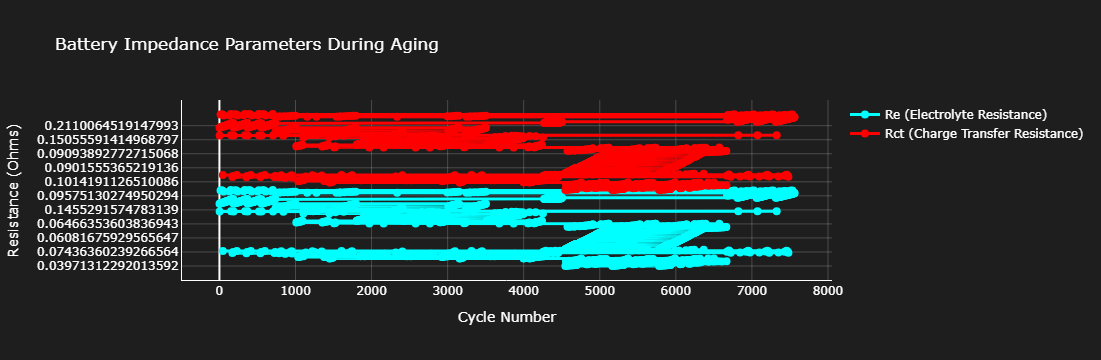

In [19]:
# Create the dark-themed Plotly figure
def create_battery_impedance_plot(data):
    # Create figure with dark theme
    fig = go.Figure()

    # Add Re (Electrolyte Resistance) trace
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data['Re'],
        mode='lines+markers',
        name='Re (Electrolyte Resistance)',
        line=dict(color='cyan', width=3),
        marker=dict(size=8, color='cyan')
    ))

    # Add Rct (Charge Transfer Resistance) trace
    fig.add_trace(go.Scatter(
        x=data.index,
        y=data['Rct'],
        mode='lines+markers',
        name='Rct (Charge Transfer Resistance)',
        line=dict(color='red', width=3),
        marker=dict(size=8, color='red')
    ))

    # Customize layout with dark theme
    fig.update_layout(
        title='Battery Impedance Parameters During Aging',
        title_font_color='white',
        plot_bgcolor='rgb(30,30,30)',
        paper_bgcolor='rgb(30,30,30)',
        font_color='white',
        xaxis=dict(
            title='Cycle Number',
            gridcolor='rgba(255,255,255,0.2)',
            tickcolor='white',
            linecolor='white'
        ),
        yaxis=dict(
            title='Resistance (Ohms)',
            gridcolor='rgba(255,255,255,0.2)',
            tickcolor='white',
            linecolor='white'
        ),
        legend=dict(
            font_color='white'
        )
    )

    fig.show()

create_battery_impedance_plot(sorted_data)

### Box plot

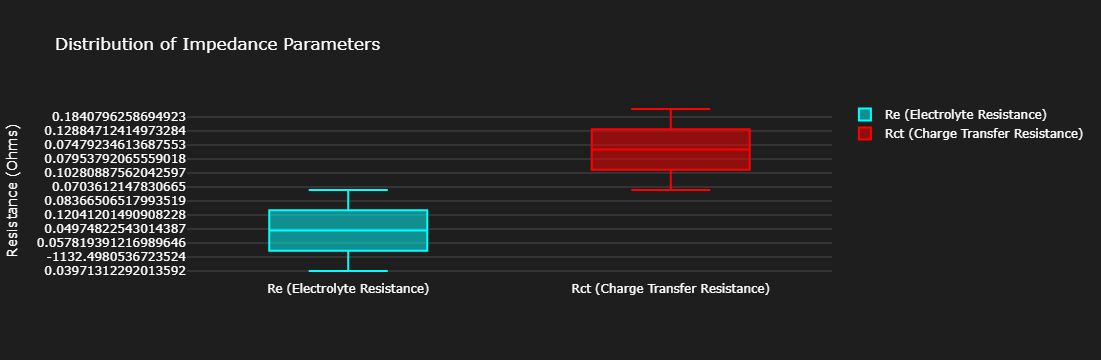

In [15]:
def create_box_plot(data):
        fig = go.Figure()
        
        fig.add_trace(go.Box(
            y=data['Re'],
            name='Re (Electrolyte Resistance)',
            marker_color='cyan'
        ))
        
        fig.add_trace(go.Box(
            y=data['Rct'],
            name='Rct (Charge Transfer Resistance)',
            marker_color='red'
        ))

        fig.update_layout(
            title='Distribution of Impedance Parameters',
            title_font_color='white',
            plot_bgcolor='rgb(30,30,30)',
            paper_bgcolor='rgb(30,30,30)',
            font_color='white',
            yaxis=dict(title='Resistance (Ohms)', gridcolor='rgba(255,255,255,0.2)')
        )
        fig.show()


create_box_plot(sorted_data)